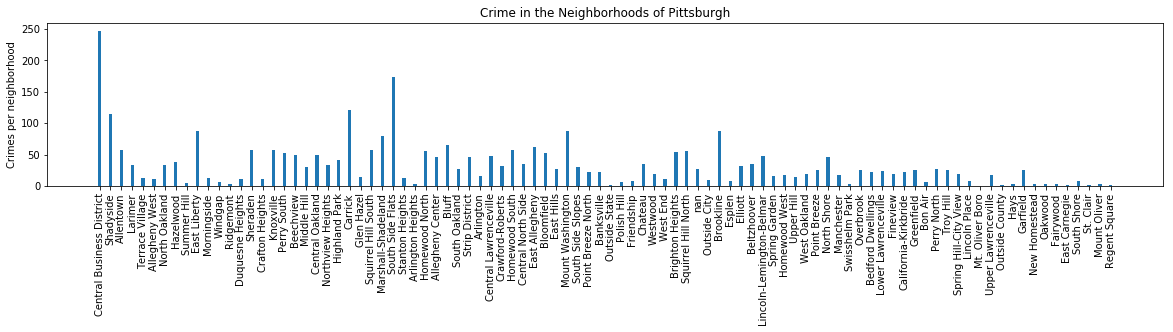

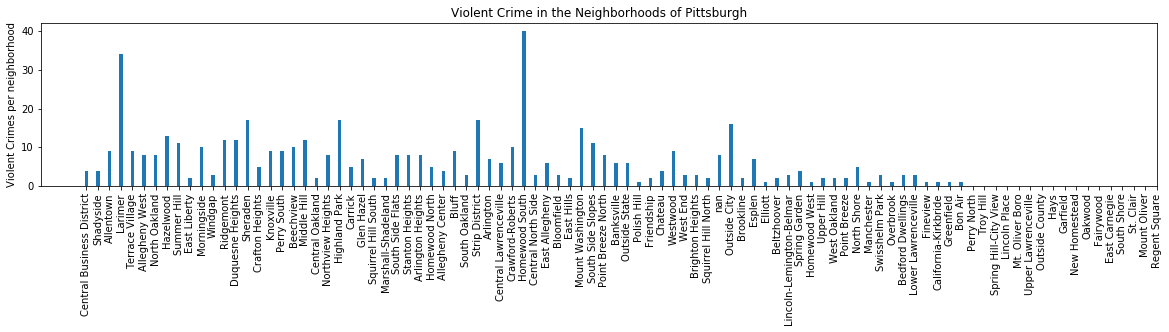

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

crime = pd.read_csv("PittsburghCrimeReports.csv")
crimeReports = pd.DataFrame()
ncr =  {} #neighborhood crime reports is a dictionary of how many crimes occur in each neighborhood of Pittsburgh

neighborhoodViolenceIndex = {}  #Index of violent crimes
neighborhoodPropertyIndex = {} #Index of property crimes
neighborhoodDrugIndex = {} #Index of drug crimes
neighborhoodSexualViolenceIndex = {}#Index of sexaul crimes

violenceKeywords = {"AGG-ASSAULT", "SIMPLE ASSAULT" "DOA", "HIT AND RUN", "ROBBERY", "THREAT"}
propertyKeywords = {"THEFT", "BURGLARY", "TRESPASS", "STOLEN PROPERTY", "CREDIT CARDS"}
drugKeywords = {"DUI", "DRUG", "DRUNKENESS"}
sexualViolenceKeywords = {"INDECENT EXPOSURE", "INDECENT ASSAULT", "LEWDNESS", "SEXUAL ASSAULT", "SEXUAL ABUSE" "LURING CHILD", "CONTACT OR COMMUNICATION W MINOR", "MEGANS LAW VIOLATION"}


for report in crime.index:
    offense = crime.loc[report, "INCIDENTHIERARCHYDESC"]
    
    #Tally offenses by neighborhood
    if crime.loc[report, "INCIDENTNEIGHBORHOOD"] in ncr:
        ncr[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] += 1
    else:
        ncr[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] = 1
    
    #Tally violent offenses by neighborhood
    for v in violenceKeywords:
        if v in offense:
            if crime.loc[report, "INCIDENTNEIGHBORHOOD"] in neighborhoodViolenceIndex:
                neighborhoodViolenceIndex[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] += 1
            else:
                neighborhoodViolenceIndex[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] = 1
            
    #Tally drug offenses by neighborhood
    for d in drugKeywords:
        if d in offense:
            if crime.loc[report, "INCIDENTNEIGHBORHOOD"] in neighborhoodDrugIndex:
                neighborhoodDrugIndex[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] += 1
            else:
                neighborhoodDrugIndex[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] = 1
            
    #Tally sexual violence offenses by neighborhood
    for s in sexualViolenceKeywords:
        if s in offense:
            if crime.loc[report, "INCIDENTNEIGHBORHOOD"] in neighborhoodSexualViolenceIndex:
                neighborhoodSexualViolenceIndex[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] += 1
            else:
                neighborhoodSexualViolenceIndex[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] = 1
                
    #Tally property crime offenses by neighborhood
    for p in propertyKeywords:
        if p in offense:
            if crime.loc[report, "INCIDENTNEIGHBORHOOD"] in neighborhoodPropertyIndex:
                neighborhoodPropertyIndex[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] += 1
            else:
                neighborhoodPropertyIndex[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] = 1
                

plt.figure(figsize=(20, 3))
plt.bar(range(len(ncr)), ncr.values(), align='center', width=0.3)
plt.xticks(range(len(ncr)), ncr.keys(), rotation='vertical')
plt.title("Crime in the Neighborhoods of Pittsburgh")
plt.ylabel("Crimes per neighborhood")
plt.show()

plt.figure(figsize=(20, 3))
plt.bar(range(len(neighborhoodViolenceIndex)), neighborhoodViolenceIndex.values(), align='center', width=0.3)
plt.xticks(range(len(ncr)), ncr.keys(), rotation='vertical')
plt.title("Violent Crime in the Neighborhoods of Pittsburgh")
plt.ylabel("Violent Crimes per neighborhood")
plt.show()

